In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import random
from typing import Tuple, Dict
from collections import defaultdict
from ds4400_final_project.dataset.common import train_and_evaluate_classifier, print_classifier_results, get_best_test_result, get_title_from_filename
from ds4400_final_project.dataset.common_plotting import plot_param_comparison_per_dataset
from ds4400_final_project.dataset.load_gtzan import load_data_from_file
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# import the data from the 3 seconds and 30 seconds features CSV
X_3, y_3, index_genre_map_3, genre_index_map_3 = load_data_from_file("features_3_sec.csv")
X_30, y_30, index_genre_map_30, genre_index_map_30 = load_data_from_file("features_30_sec.csv")

In [4]:
# split all the data into training, validation and testing sets
TEST_SIZE = 0.20
VAL_SIZE = 0.25
RANDOM_STATE = 42

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_30_train, x_30_test, y_30_train, y_30_test = train_test_split(X_30, y_30, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_3_train, x_3_val, y_3_train, y_3_val = train_test_split(x_3_train, y_3_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_30_train, x_30_val, y_30_train, y_30_val = train_test_split(x_30_train, y_30_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

In [5]:
# list of all solvers to try
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
# list of all datasets to try
csv_files = {
	"features_3_sec.csv": [x_3_train, x_3_val, x_3_test, y_3_train, y_3_val, y_3_test, index_genre_map_3, genre_index_map_3],
	"features_30_sec.csv": [x_30_train, x_30_val, x_30_test, y_30_train, y_30_val, y_30_test, index_genre_map_30, genre_index_map_30]
}

# { CSV_FILENAME: { SOLVER: ( TRAIN_ACC, TEST_ACC, FAILED_COUNT ) } 
results: Dict[str, Dict[str, Tuple]] = defaultdict(dict)

# iterate over all solvers
for solver in solvers:
	# iterate over all datasets
	for filename in csv_files.keys():
		# construct the model
		classifier = LogisticRegression(solver=solver, max_iter=10000)

		x_train, x_val, x_test, y_train, y_val, y_test, index_genre_map, genre_index_map = csv_files[filename]
		# train and evaluate the model
		train_acc, val_acc, test_acc, failed_count = train_and_evaluate_classifier(
			classifier,
			X_train=x_train,
			y_train=y_train,
			X_val=x_val,
			y_val=y_val,
			X_test=x_test,
			y_test=y_test,
			index_genre_map=index_genre_map,
			genre_index_map=genre_index_map
		)
		results[filename][solver] = (train_acc, val_acc, test_acc, failed_count)

In [6]:
# print all results from all models
for filename, result in results.items():
	for solver, (train_acc, val_acc, test_acc, failed_count) in result.items():
		title = get_title_from_filename(filename)
		print_classifier_results(f"{title} ({solver})",
		                         train_acc, val_acc, test_acc, failed_count)


Features 3 Sec (newton-cg)
Train accuracy: 74.16%
Train error:    25.84%
Train accuracy: 71.92%
Train error:    28.08%
Test accuracy:  72.92%
Test error:     27.08%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 484            | 18.3%              |
| 02  | COUNTRY    | 353            | 13.3%              |
| 03  | REGGAE     | 350            | 13.2%              |
| 04  | HIPHOP     | 338            | 12.7%              |
| 05  | DISCO      | 326            | 12.3%              |
| 06  | BLUES      | 259            | 9.8%               |
| 07  | POP        | 176            | 6.6%               |
| 08  | JAZZ       | 174            | 6.6%               |
| 09  | METAL      | 133            | 5.0%               |
| 10  | CLASSICAL  | 58             | 2.2%               |
Features 3 Sec (lbfgs)
Train accuracy: 74.16%
Train error:    25.84%
Train accuracy: 71.92%
Train error:    28.08%
Test accura

In [7]:
# print the results from the model with the best test accuracy
filename, solver, (train_acc, val_acc, test_acc, failed_count) = get_best_test_result(results)
title = get_title_from_filename(filename)
print_classifier_results(f"Best Validation Result: {title} ({solver})", train_acc, val_acc, test_acc, failed_count)

Best Validation Result: Features 30 Sec (newton-cg)
Train accuracy: 92.33%
Train error:    7.67%
Train accuracy: 72.5%
Train error:    27.5%
Test accuracy:  68.5%
Test error:     31.5%

| #   | Genre      | # of Incorrect | % of All Incorrect |
| --- |    ---     |      ---       |        ---         |
| 01  | ROCK       | 26             | 15.9%              |
| 02  | REGGAE     | 23             | 14.0%              |
| 03  | HIPHOP     | 21             | 12.8%              |
| 04  | COUNTRY    | 20             | 12.2%              |
| 05  | DISCO      | 20             | 12.2%              |
| 06  | BLUES      | 17             | 10.4%              |
| 07  | JAZZ       | 13             | 7.9%               |
| 08  | METAL      | 10             | 6.1%               |
| 09  | POP        | 10             | 6.1%               |
| 10  | CLASSICAL  | 4              | 2.4%               |


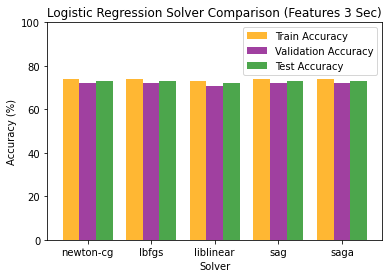

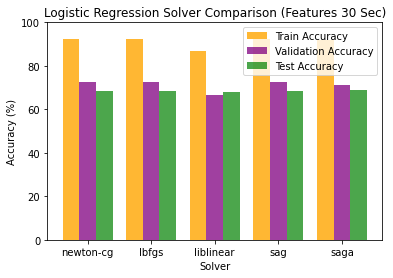

In [8]:
plot_param_comparison_per_dataset("Logistic Regression Solver Comparison", "Solver", results)